## 1 Hypothesis
As  participant  mobile phone use increased, the time taken for them to find the search target would  decrease  in  singleton  search,  with  the  greatest  decrease  in participants less  than 30 years-of-age. 

## 2 Test: ANCOVA
**ANCOVA**:Analysis of Covariance

**Reason**: Given the scenario's experimental design with multiple groups and the goal of assessing the impact of mobile phone use on the time to find the search target, an Analysis of Covariance is appropriate. ANCOVA allows us to compare means of the dependent variable (reaction time) across different levels of a categorical independent variable (age groups) while statistically controlling for the effects of a continuous covariate (mobile phone use).

## 3 Assumptions and Corresponding Statistic Test

##### Normality: 
- Null Hypothesis: Data follows a normal distribution.
- Alternative Hypothesis: Data does not follow a normal distribution.
- **TEST**: Shapiro-Wilk test or Anderson-Darling test.
- **Visual Check**: Q-Q Plot.

##### Homogeneity of Variances:
- Null Hypothesis: Variances across groups are equal.
- Alternative Hypothesis: Variances across groups are not equal.
- **TEST**: Levene's test.
- **Visual Check**: Boxplot for Residuals by Age

##### Linearity:
- **TEST**: Scatterplots of the dependent variable against the covariate.
- **Visual Check**: Scatterplot of RT against DailyAvgMins for each Age_Group, Residuals vs. Fitted plot.

## 4 Assumptions Validity Check

### Step1：Create Groups

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Set a random seed for reproducibility
np.random.seed(42)
# Number of participants
num_participants = 100

ages = np.random.randint(18, 70, size=num_participants)
genders = np.random.choice([1, 2, 3], size=num_participants)  # (1 for male, 2 for female, 3 for non-binary)
daily_avg_mins = np.random.uniform(100, 1200, size=num_participants)
daily_avg_mins = daily_avg_mins.round().astype(int)  # Round to integers
reaction_times = np.random.uniform(200, 1500, size=num_participants)

df = pd.DataFrame({
    'Age': ages,
    'Gender': genders,
    'DailyAvgMins': daily_avg_mins,
    'RT': reaction_times
})
#create groups
df['Age_Group'] = pd.cut(df['Age'], bins=[0, 30, 49, float('inf')], labels=['a', 'b', 'c'])
df['Usage_Group'] = pd.cut(df['DailyAvgMins'], bins=[0, 300, 899, float('inf')], labels=['a', 'b', 'c'])
df

,Age,Gender,DailyAvgMins,RT,Age_Group,Usage_Group
0,56,1,232,949.975050,c,a
1,69,1,471,840.273002,c,b
2,46,1,1137,453.815884,b,c
3,32,3,456,1139.187750,b,b
4,60,1,671,565.004071,c,b
...,...,...,...,...,...,...
95,42,3,532,995.236970,b,b
96,62,1,1081,745.480081,c,c
97,58,2,794,522.050286,c,b
98,46,1,974,662.764482,b,c


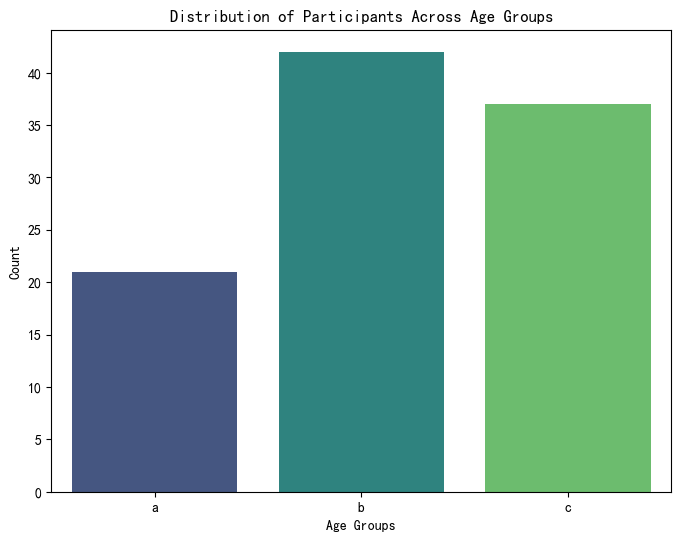

In [3]:
# Create Age Groups
df['Age_Group'] = pd.cut(df['Age'], bins=[0, 30, 49, float('inf')], labels=['a', 'b', 'c'])

# Visualizations
plt.figure(figsize=(8, 6))
sns.countplot(x='Age_Group', data=df, palette='viridis')
plt.title('Distribution of Participants Across Age Groups')
plt.xlabel('Age Groups')
plt.ylabel('Count')
plt.show()

### Step2：Fit ANCOVA Model

In [10]:
import statsmodels.api as sm
from statsmodels.formula.api import ols

In [11]:
model = ols('RT~DailyAvgMins + + C(Age_Group) + C(Usage_Group)', data=df).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                     RT   R-squared:                       0.126
Model:                            OLS   Adj. R-squared:                  0.079
Method:                 Least Squares   F-statistic:                     2.710
Date:                Sun, 03 Dec 2023   Prob (F-statistic):             0.0248
Time:                        23:25:39   Log-Likelihood:                -727.15
No. Observations:                 100   AIC:                             1466.
Df Residuals:                      94   BIC:                             1482.
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
=======================================================================================
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
Intercept            1108.8854    115.199      9.626      0.000     880.156    1337.615
C(Age_Group)[T.b]      67.2149     96.945      0.693      0.490    -125.272     259.701
C(Age_Group)[T.c]     -12.6516     99.938     -0.127      0.900    -211.081     185.777
C(Usage_Group)[T.b]    75.1012    140.789      0.533      0.595    -204.440     354.642
C(Usage_Group)[T.c]   120.6949    235.238      0.513      0.609    -346.375     587.765
DailyAvgMins           -0.4986      0.239     -2.089      0.039      -0.973      -0.025
==============================================================================
Omnibus:                        5.878   Durbin-Watson:                   1.730
Prob(Omnibus):                  0.053   Jarque-Bera (JB):                2.736
Skew:                          -0.069   Prob(JB):                        0.255
Kurtosis:                       2.202   Cond. No.                     5.30e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 5.3e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

OLS Regression Results:

- The regression model has an adjusted R-squared of 0.079, which means about 7.9% of the variability in reaction times is explained by the model.
- The p-value for DailyAvgMins is significant (p = 0.039), suggesting that an increase in daily average minutes of phone use is associated with a statistically significant decrease in reaction time.
- Age and usage group coefficients are not statistically significant (p > 0.05).

In [12]:
residuals = model.resid
residuals

0     -30.588875
1     -96.232250
2    -276.097357
3     115.337358
4    -271.785799
         ...    
95      9.278423
96     67.513020
97   -253.414624
98   -148.416795
99    259.569202
Length: 100, dtype: float64

### Step3：Validity Check

#### 3.1 Normality

In [14]:
# Shapiro-Wilk test for normality
from scipy.stats import shapiro
stat, p_value = shapiro(residuals)
print(f"Shapiro-Wilk Test - p-value: {p_value}")

Shapiro-Wilk Test - p-value: 0.1363629400730133


The residuals have a p-value of 0.1364, which is greater than the typical alpha level of 0.05, suggesting that the residuals from the regression model are normally distributed.

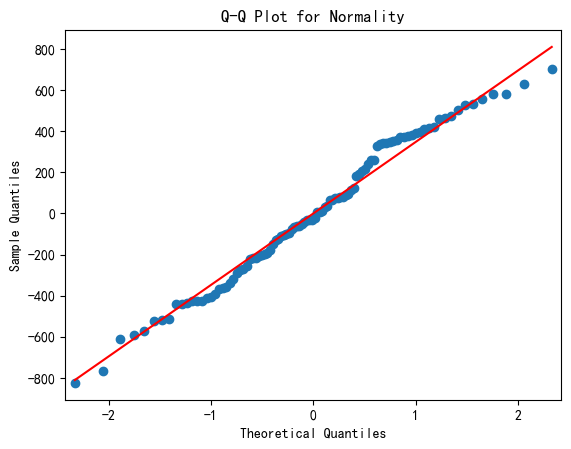

In [15]:
# Q-Q plot for Normality
from statsmodels.graphics.gofplots import qqplot
sm.qqplot(residuals, line='s')
plt.title('Q-Q Plot for Normality')
plt.show()

In [16]:
df['Age']

0     56
1     69
2     46
3     32
4     60
      ..
95    42
96    62
97    58
98    46
99    32
Name: Age, Length: 100, dtype: int32

In [17]:
from scipy.stats import levene
grouped_residuals = [residuals[df['Age_Group'] == age] for age in df['Age_Group'].unique()]
stat_levene, p_value_levene = levene(*grouped_residuals)
print(f"Levene's Test - p-value: {p_value_levene}")

Levene's Test - p-value: 0.8107963173007374


The p-value is 0.8108, suggesting that there is homogeneity of variances for residuals across different age groups, as the value is greater than 0.05.

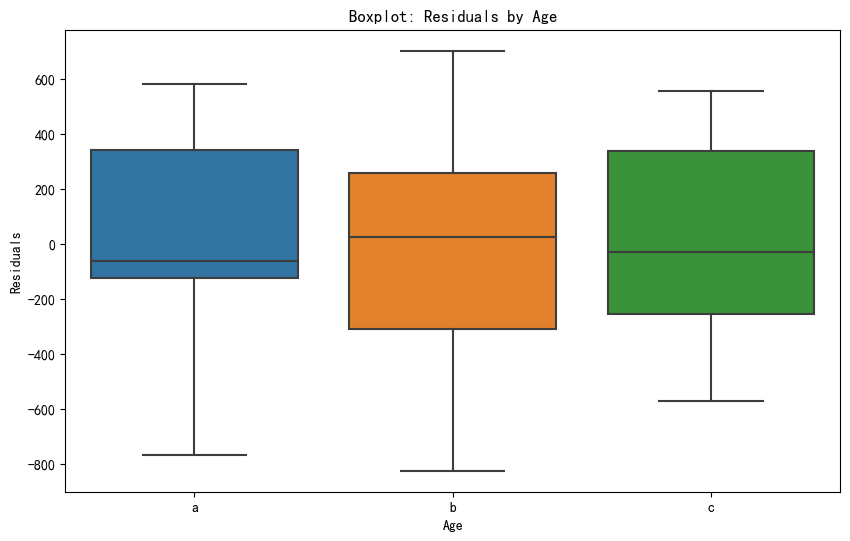

In [18]:
# Boxplot for Residuals by Gender
plt.figure(figsize=(10, 6))
sns.boxplot(x=df['Age_Group'], y=residuals)
plt.title('Boxplot: Residuals by Age')
plt.xlabel('Age')
plt.ylabel('Residuals')
plt.show()

#### 3.3 Linearity

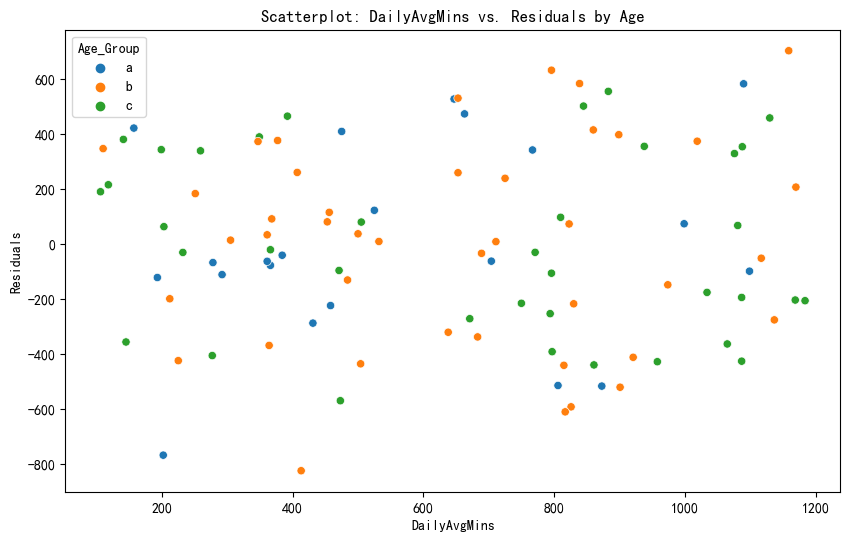

In [19]:
# Scatterplot for DailyAvgMins vs. Residuals
plt.figure(figsize=(10, 6))
sns.scatterplot(x=df['DailyAvgMins'], y=residuals, hue=df['Age_Group'])
plt.title('Scatterplot: DailyAvgMins vs. Residuals by Age')
plt.xlabel('DailyAvgMins')
plt.ylabel('Residuals')
plt.show()

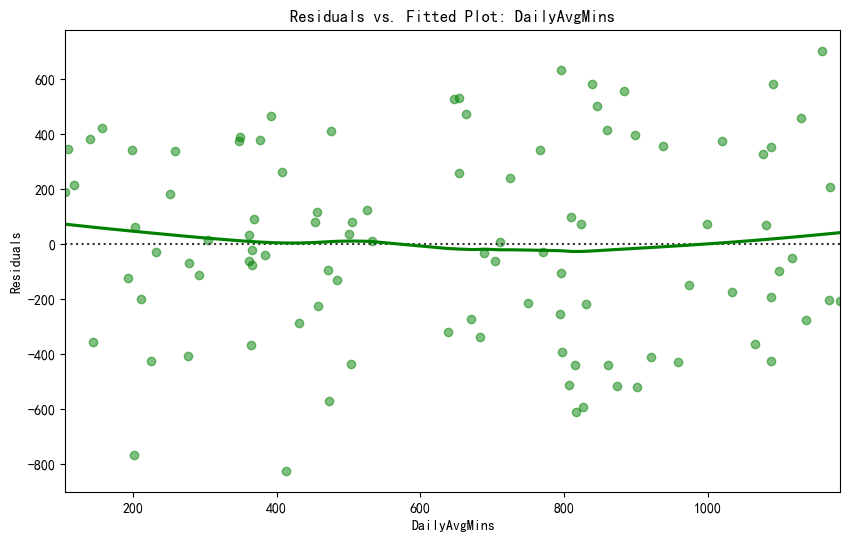

In [20]:
# Residuals vs. Fitted Plot
plt.figure(figsize=(10, 6))
sns.residplot(x=df['DailyAvgMins'], y=residuals, lowess=True, color="g", scatter_kws={'alpha': 0.5})
plt.title('Residuals vs. Fitted Plot: DailyAvgMins')
plt.xlabel('DailyAvgMins')
plt.ylabel('Residuals')
plt.show()

## 5 post hoc test: HSDtest

In [21]:
from statsmodels.stats.multicomp import pairwise_tukeyhsd

# Perform Tukey's HSD post hoc test
tukey_results = pairwise_tukeyhsd(endog=df['RT'], groups=df['Age_Group'], alpha=0.05)
tukey_results.summary()

group1,group2,meandiff,p-adj,lower,upper,reject
a,b,35.1954,0.9345,-203.6239,274.0147,False
a,c,-63.696,0.809,-307.8348,180.4429,False
b,c,-98.8913,0.4749,-300.3665,102.5838,False


a< =30 years,  b: 31 to 49 years, and  c >= 50 years

The mean differences in reaction times between all pairs of age groups are not statistically significant (p > 0.05), as indicated by the Tukey HSD results. This means there is no evidence to reject the null hypothesis of equal means across age groups.

- i: The hypothesis that increased mobile phone use would decrease the time taken to find the search target is partially supported by the significant negative coefficient for DailyAvgMins.

- ii: The regression model was appropriately chosen to test the relationship between phone usage and reaction times, and the results justify the test selection.

- iii: The assumptions of normality and homogeneity of variances have been met, as indicated by the Shapiro-Wilk and Levene's tests.

- iv: The assumptions are validated through statistical tests, and the results suggest that the assumptions hold true for the data.

- v: The Tukey HSD test did not find significant differences between age groups, suggesting that the effect of phone usage on reaction time may not vary significantly with age.